<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آزمون فرض ۱
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
●	به نظر شما درآمد خانوارهای شهری و روستایی در استان چهارمحال و بختیاری با هم برابر است؟
</font>
</p>

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import norm, expon, boxcox, shapiro

In [10]:
# some utility functions
def convert_float(data):
    try:
        if pd.isna(data):  
            return 0
        else:
            return float(data)
    except:  
        return 0
def remove_outliers_iqr(df_col):
    """
    Remove outliers from a pandas Series using the IQR method.

    Parameters:
    df_col (pd.Series): The column from which outliers need to be removed.

    Returns:
    pd.Series: The column with outliers removed.
    """
    q1 = df_col.quantile(0.25)
    q3 = df_col.quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df_cleaned_col = df_col[(df_col >= lower_bound) & (df_col <= upper_bound)]
    
    return df_cleaned_col
    
def check_normality_stat(data, alpha=0.1):
    """
    Check the normality of a sample distribution using the Shapiro-Wilk test.

    Parameters:
    data: array-like, the sample distribution to check.
    alpha: float, significance level to test against. Default is 0.05.

    Returns:
    bool: True if data is normally distributed (p-value > alpha), False otherwise.
    
    Interpretation: if the p value is less than the chosen alpha level, 
    then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed.
    """
    
    # Shapiro-Wilk Test
    stat, p_value = shapiro(data)
    print(f"Shapiro-Wilk Test: Statistics={stat}, p-value={p_value:.4f}")
    
    # return true if data is normally distributed
    return p_value > alpha


In [3]:
# file names and directories
data_dir = '../Data/'
R_files = ['R98', 'R99', 'R1400', 'R1401']
U_files = ['U98', 'U99', 'U1400', 'U1401']

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بررسی داده‌ها نشان می‌دهد که درآمد‌ها در بخش چهارم هستند.
در این بخش چهار قسمت داریم که باید درآمدهای خانوار در هر یک از این بخش‌ها جمع زده شود.
</font>
<font face="vazir" size=3>
همچنین از آنجا که می‌دانیم به علت تورم درآمدها سال به سال بیشتر شده است برای کاهش تاثیر این مسئله هر سال را جداگانه بررسی می‌کنیم.
</font>
</p>

In [4]:
def extract_income(files):
    income = []
    for file_name in files:
        # calculating Income column for each file
        # Section 1
        s1 = pd.read_excel(f'../Data/{file_name}.xlsx', sheet_name=(file_name+'P4S01'))
        s1 = s1[['Address', 'netincome_w_y']].rename(columns={'netincome_w_y': 'Income'})
        # Section 2
        s2 = pd.read_excel(f'../Data/{file_name}.xlsx', sheet_name=(file_name+'P4S02'))
        s2['income_s_y'] = s2['income_s_y'].apply(convert_float)
        s2 = s2[['Address', 'income_s_y']].rename(columns={'income_s_y': 'Income'})
        # Section 3        
        s3 = pd.read_excel(f'../Data/{file_name}.xlsx', sheet_name=(file_name+'P4S03'))
        s3['income_pension'] = s3['income_pension'].apply(convert_float)
        s3['income_rent'] = s3['income_rent'].apply(convert_float)
        s3['income_interest'] = s3['income_interest'].apply(convert_float)
        s3['income_aid'] = s3['income_aid'].apply(convert_float)
        s3['income_resale'] = s3['income_resale'].apply(convert_float)
        s3['income_transfer'] = s3['income_transfer'].apply(convert_float)
        s3['Income'] =  (s3['income_pension'] + 
                s3['income_rent'] + 
                s3['income_interest'] + 
                s3['income_aid'] + 
                s3['income_resale'] + 
                s3['income_transfer'])
        s3 = s3[['Address', 'Income']]
        # Section 4
        s4 = pd.read_excel(f'../Data/{file_name}.xlsx', sheet_name=(file_name+'P4S04'))
        s4 = s4[['Address', 'subsidy']].rename(columns={'subsidy': 'Income'})
        total = pd.concat([s1, s2, s3, s4])
        total_grouped = total.groupby('Address').agg({'Income': 'sum'}).reset_index()
        
        # filter addresses for specified region with code: 14
        total_grouped['region'] = total_grouped['Address'].apply(lambda x: str(x)[1:3])
        total_grouped = total_grouped[total_grouped['region'] == '14']
        total_grouped.drop('region', axis=1, inplace=True)
        income.append(total_grouped)
    return income

In [5]:
R_income = extract_income(R_files)

In [6]:
U_income = extract_income(U_files)

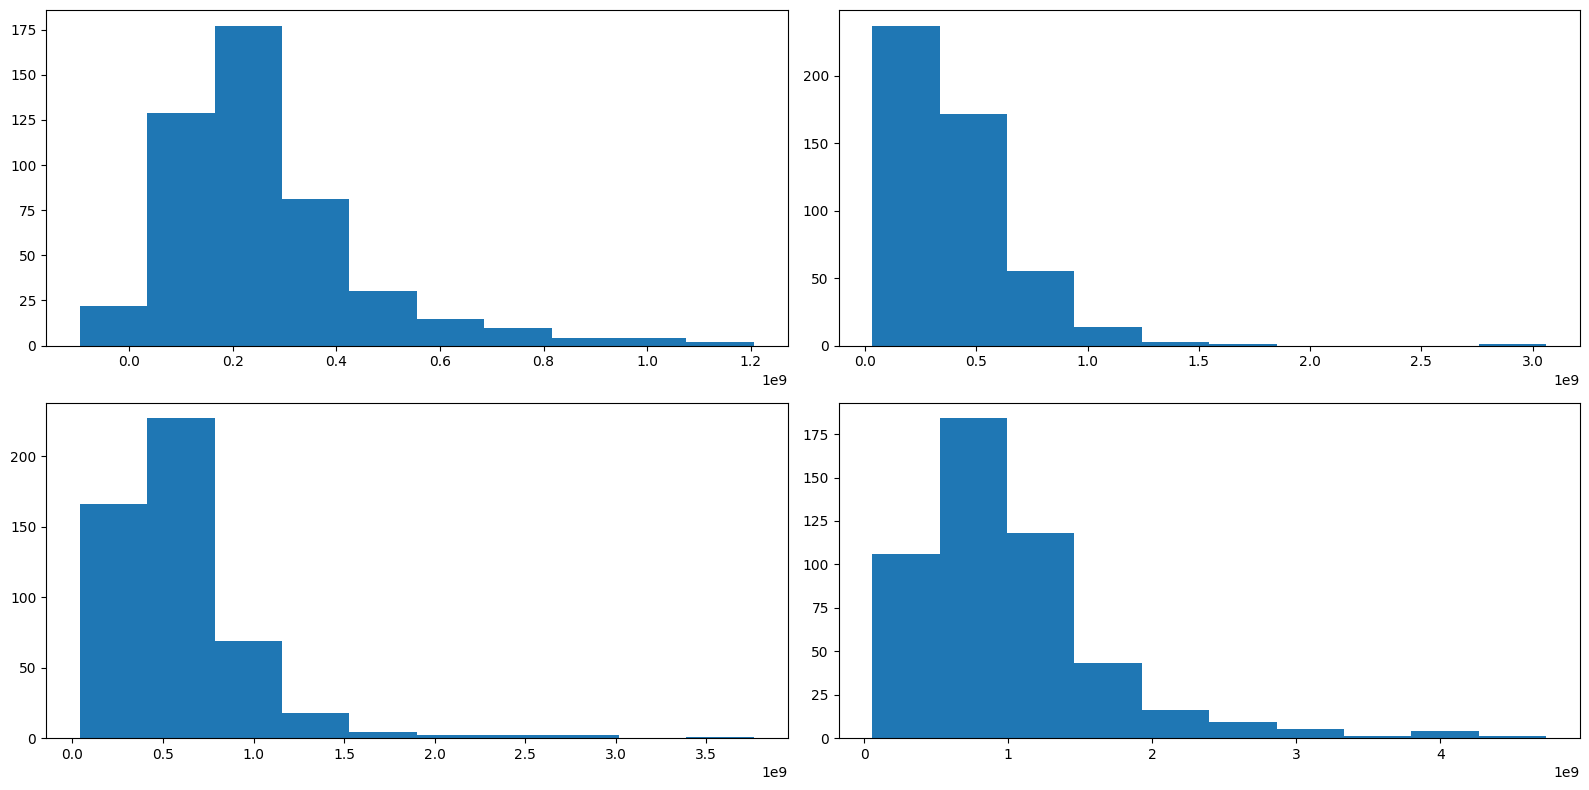

In [8]:
plt.figure(figsize=(16, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(R_income[i]['Income'])
plt.tight_layout()    
plt.show()

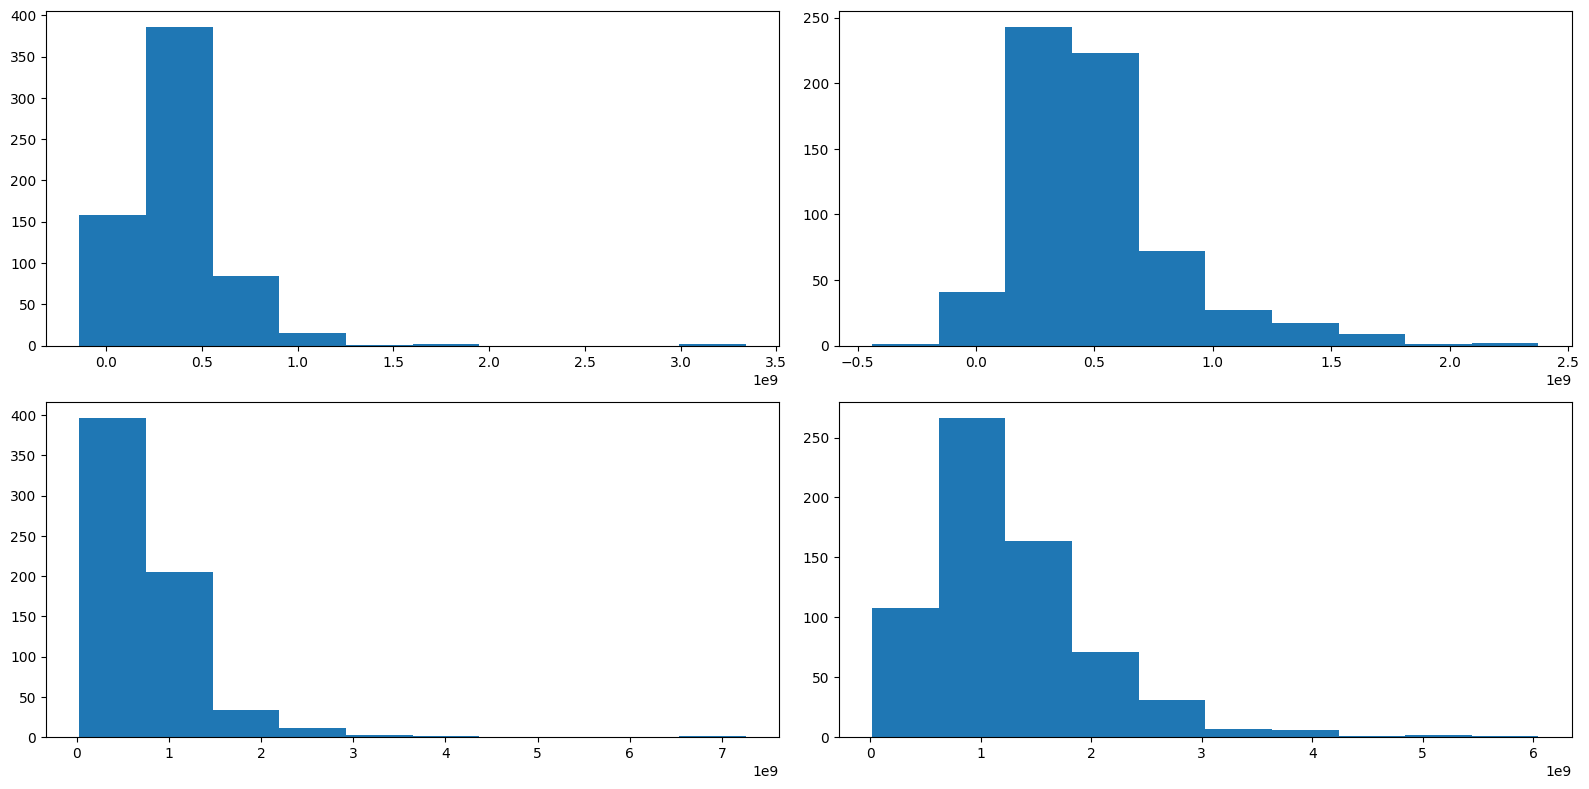

In [9]:
plt.figure(figsize=(16, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(U_income[i]['Income'])
plt.tight_layout()    
plt.show()

In [16]:
# removing outliers
for i in range(4):
    R_income[i] =  remove_outliers_iqr(R_income[i]['Income'])
    U_income[i] =  remove_outliers_iqr(U_income[i]['Income'])

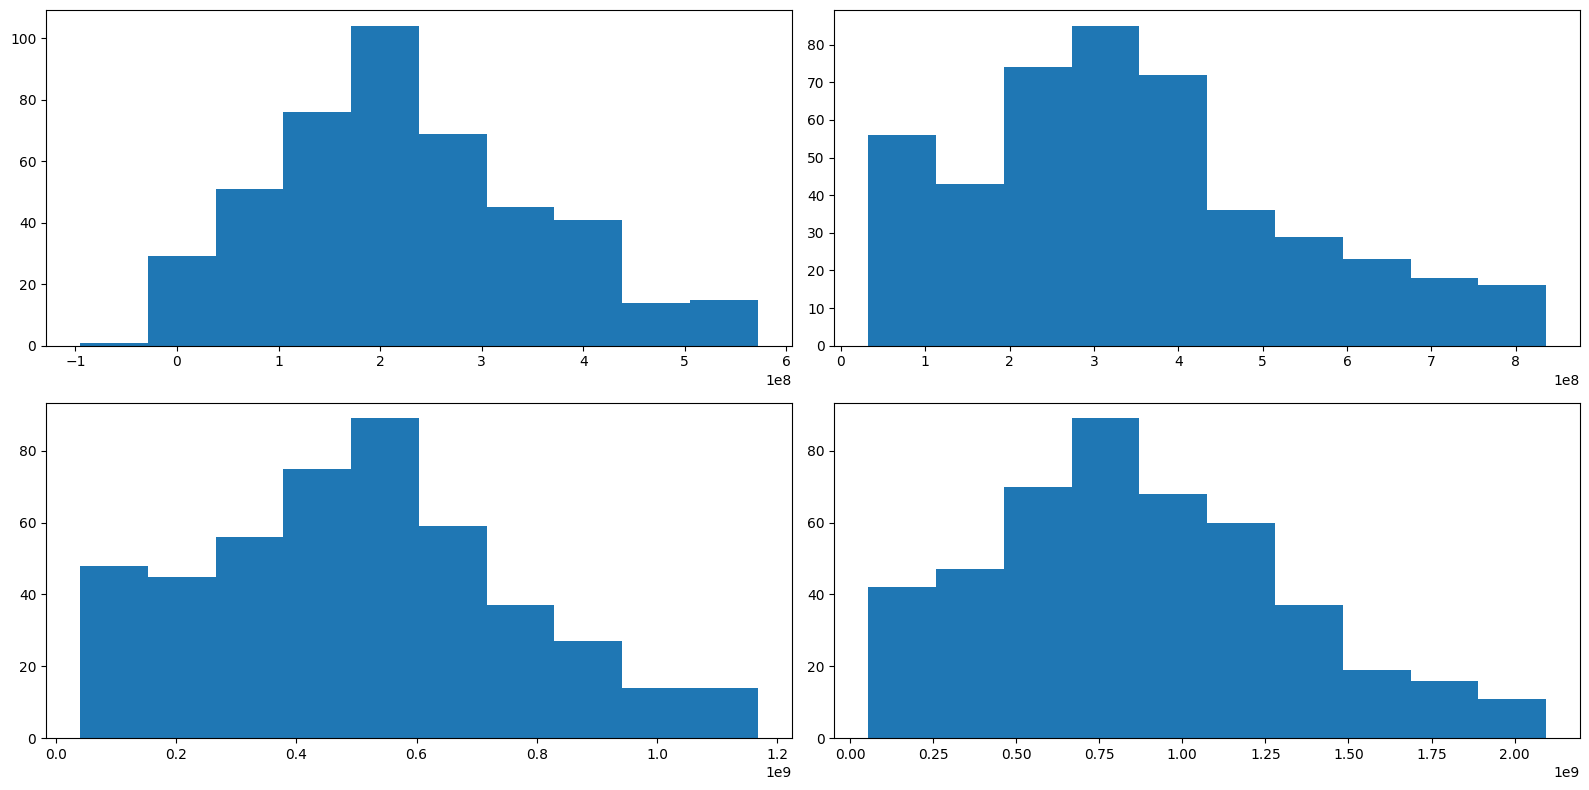

In [19]:
plt.figure(figsize=(16, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(R_income[i])
plt.tight_layout()    
plt.show()

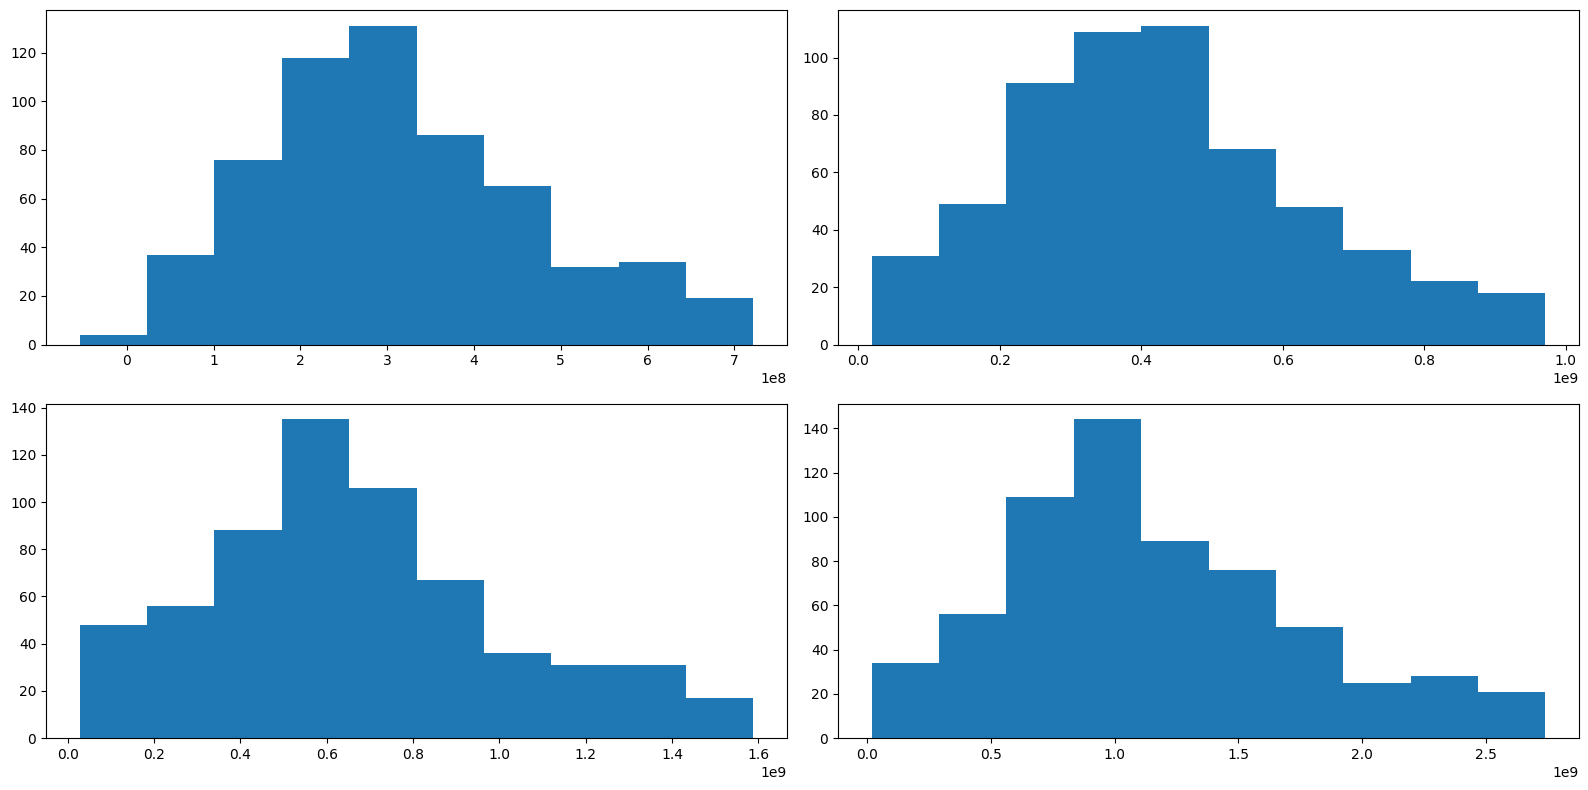

In [20]:
plt.figure(figsize=(16, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(U_income[i])
plt.tight_layout()    
plt.show()

In [22]:
# check normality of R Incomes
for i in range(4):
    is_normal = check_normality_stat(R_income[i])
    print(is_normal)

Shapiro-Wilk Test: Statistics=0.9730551795696546, p-value=0.0000
False
Shapiro-Wilk Test: Statistics=0.9628057604306923, p-value=0.0000
False
Shapiro-Wilk Test: Statistics=0.9811913019669974, p-value=0.0000
False
Shapiro-Wilk Test: Statistics=0.9781282201930894, p-value=0.0000
False


In [24]:
# check normality of U Incomes
for i in range(4):
    is_normal = check_normality_stat(U_income[i])
    print(is_normal)

Shapiro-Wilk Test: Statistics=0.9728091834088329, p-value=0.0000
False
Shapiro-Wilk Test: Statistics=0.9800155310547085, p-value=0.0000
False
Shapiro-Wilk Test: Statistics=0.971178949187784, p-value=0.0000
False
Shapiro-Wilk Test: Statistics=0.9702625172838548, p-value=0.0000
False


In [36]:
for i in range(4):
    R_income[i] = R_income[i][R_income[i] > 0]
    U_income[i] = U_income[i][U_income[i] > 0]


In [41]:
# transforming data
R_transformed = []
U_transformed = []
for i in range(4):
    r_temp, _ = boxcox(R_income[i])
    u_temp, _ = boxcox(U_income[i])
    R_transformed.append(r_temp)
    U_transformed.append(u_temp)

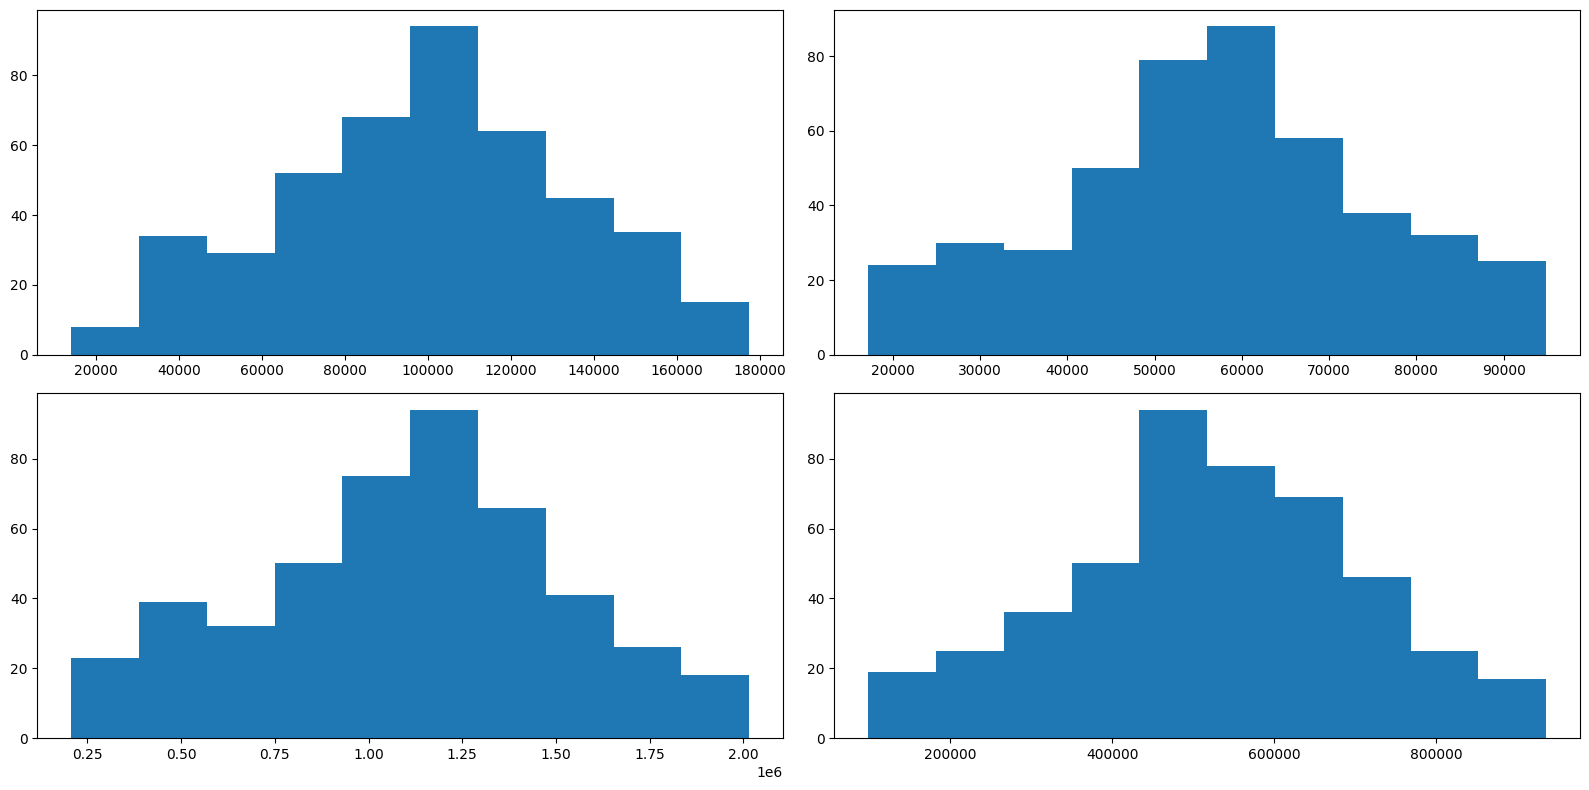

In [42]:
plt.figure(figsize=(16, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(R_transformed[i])
plt.tight_layout()    
plt.show()

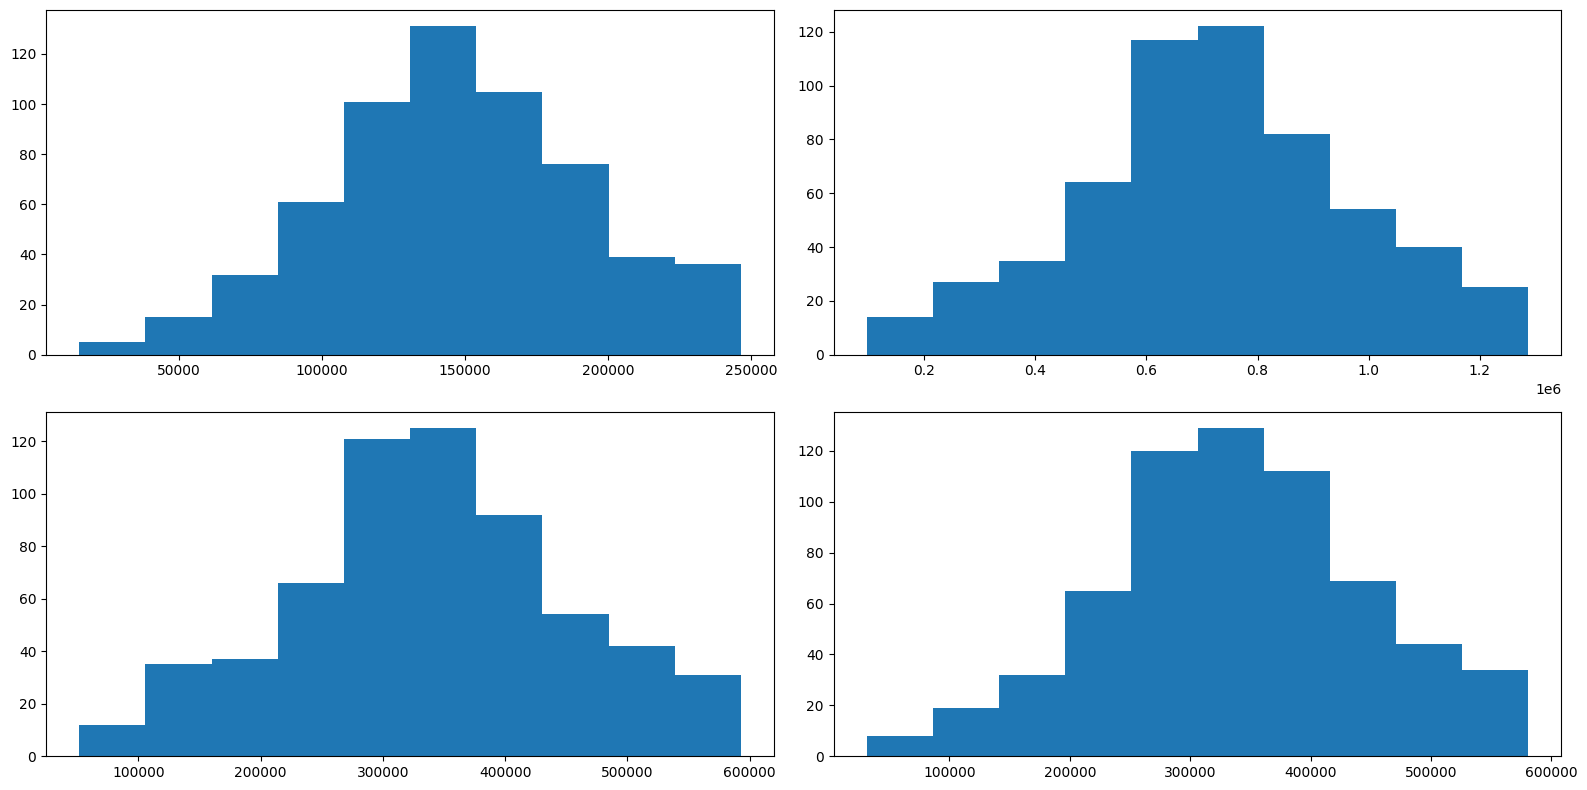

In [43]:
plt.figure(figsize=(16, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(U_transformed[i])
plt.tight_layout()    
plt.show()

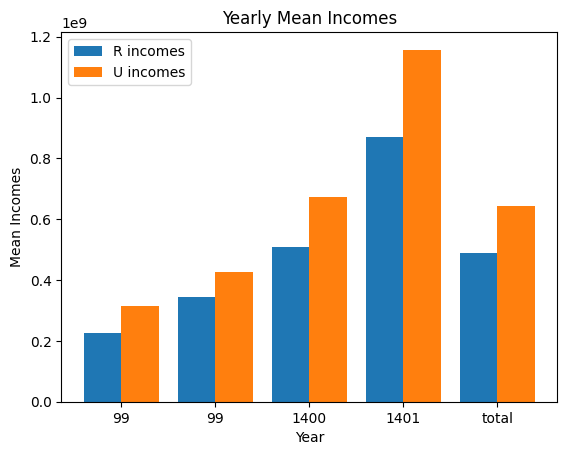

In [45]:
R_yearly_mean = []
U_yearly_mean = []
for i in range(4):
    R_yearly_mean.append(np.mean(R_income[i]))
    U_yearly_mean.append(np.mean(U_income[i]))

R_total_mean = np.mean(R_yearly_mean)
R_yearly_mean.append(R_total_mean) 
U_total_mean = np.mean(U_yearly_mean) 
U_yearly_mean.append(U_total_mean) 

# Set positions for the bars
bar_width = 0.4
x = np.arange(5)

# Plot bars for R incomes
plt.bar(x - bar_width/2, R_yearly_mean, bar_width, label='R incomes', color='#1f77b4')

# Plot bars for U incomes
plt.bar(x + bar_width/2, U_yearly_mean, bar_width, label='U incomes', color='#ff7f0e')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean Incomes')
plt.title('Yearly Mean Incomes')
plt.xticks(x, ['99', '99', '1400', '1401', 'total'])  # Set x-ticks to the year labels
plt.legend()  # Show the legend

# Show the plot
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
نمودار میانگین درآمد سال به سال نشان‌ می‌دهد که درآمد‌های شهری و روستایی استان چهار محال و بختیاری یکسان نیستند.
حال آزمون فرض زیر را برای هر سال بررسی می‌کنیم:
</font>
</p>

\begin{align*}
& H_{0}: \mu_{R} = \mu_{U}\\
& H_{1}: \mu_{R} \neq \mu_{U}\\
\end{align*}

In [50]:
# year 1398
t_statistic, p_value = sp.stats.ttest_ind(R_transformed[0], U_transformed[0])
round(p_value,2)

0.0

In [51]:
# year 1399
t_statistic, p_value = sp.stats.ttest_ind(R_transformed[1], U_transformed[1])
round(p_value,2)

0.0

In [52]:
# year 1400
t_statistic, p_value = sp.stats.ttest_ind(R_transformed[2], U_transformed[2])
round(p_value,2)

0.0

In [53]:
# year 1401
t_statistic, p_value = sp.stats.ttest_ind(R_transformed[3], U_transformed[3])
round(p_value,2)

0.0

for years 1398-1401: P_value is 0

H<sub>0</sub> is rejected

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
محاسبات بالا نشان می‌دهد که برای سال‌های ۱۳۹۸ تا ۱۴۰۱ در استان چهار محال و بختیاری درآمد شهری با درآمد روستایی برابر نیستند.
</font>
</p>